In [2]:
#!/usr/bin/python3
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.ticker as ticker

def timescanplot(fname, location):

    os.chdir(location)
    with open(fname, 'r') as f: file = f.readlines()
    
    skip = [num for num, line in enumerate(file) if 'ALL:' in line.split()]
    iterations = np.array([int(i.split()[-1].strip()) for i in file if '#mass' in i.split()])
    length = len(iterations)

    data = np.genfromtxt(fname, skip_header = skip[0]+1)

    cycle = int(len(data)/iterations.sum())
    time = data[:,1][:cycle]

    temp, temp1, temp2, mass, counts = [], [], [], [], []
    k = 0
    for i in range(len(iterations)):
        j = iterations[i]*cycle
        mass.append(data[:,0][k])
        counts.append(data[:,2][k:k+j])
        k += j
        
        for c in range(cycle):
            for l in range(iterations[i]):
                temp.append(counts[i][(l*cycle)+c])
            temp1.append(temp)
            temp = []
        temp2.append(temp1)
        temp1 = []
        
    mean = [[np.array(temp2[i][j]).mean() for j in range(cycle)]for i in range(length)]
    error = [[(np.array(temp2[i][j]).std()/np.sqrt(iterations[i])) for j in range(cycle)]for i in range(length)]
    mass, mean, error = np.array(mass), np.array(mean), np.array(error)
    
    return mass, iterations, mean, error, time

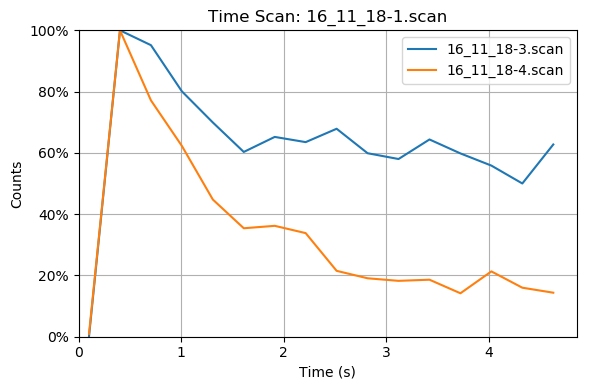

In [13]:
location = 'D:\\FELion-Spectrum-Analyser\\testing\\_datas'

files1 = ['16_11_18-2.scan','16_11_18-1.scan']
files = ['16_11_18-3.scan', '16_11_18-4.scan']

fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)

file_full = []

for f in files:
    
    mass, iterations, mean, error, time = timescanplot(f, location)
    time = time/1000
    length = len(iterations)
    
    for i in range(length):
        
        new_mean = (mean[i]/mean[i].max())*100
        ax.plot(time, new_mean, label=f)
        
        ax.yaxis.set_major_formatter(ticker.PercentFormatter())
        ax.set_ylim(ymin=0, ymax=100)
        ax.set_xlim(xmin=0)
        
plt.grid(True)
plt.title('Time Scan: %s'%fname)
plt.xlabel('Time (s)')
plt.ylabel('Counts')
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

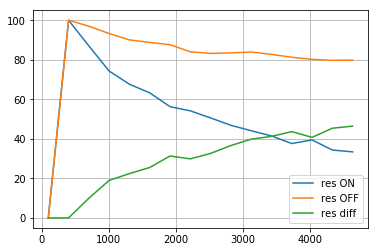

In [50]:
fname = '16_11_18-1.scan'
fname1 = '16_11_18-2.scan'

mass, iterations, mean, error, time = timescanplot(fname, location)
mass1, iterations1, mean1, error1, time = timescanplot(fname1, location)

new_mean = mean[0]
new_mean = (new_mean/new_mean.max())*100

new_mean1 = mean1[0]
new_mean1 = (new_mean1/new_mean1.max())*100

plt.plot(time, new_mean, label='res ON')
plt.plot(time, new_mean1, label='res OFF')

new_mean3 = new_mean1-new_mean
plt.plot(time, new_mean3, label='res diff')

plt.legend()
plt.grid(True)

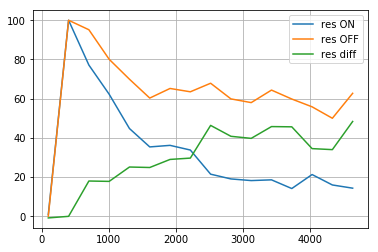

In [51]:
fname = '16_11_18-4.scan'
fname1 = '16_11_18-3.scan'

mass, iterations, mean, error, time = timescanplot(fname, location)
mass1, iterations1, mean1, error1, time = timescanplot(fname1, location)

new_mean = mean[0]
new_mean = (new_mean/new_mean.max())*100

new_mean1 = mean1[0]
new_mean1 = (new_mean1/new_mean1.max())*100

plt.plot(time, new_mean, label='res ON')
plt.plot(time, new_mean1, label='res OFF')

new_mean3 = new_mean1-new_mean
plt.plot(time, new_mean3, label='res diff')

plt.legend()
plt.grid(True)